In [1]:
import pandas as pd
df=pd.read_csv("train.csv")

In [2]:
import numpy as np

In [3]:
df
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.ix[:,4]=le.fit_transform(df.ix[:,4])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [5]:
def name_classifier(name_df):    
    name_class_df = pd.DataFrame(columns=['miss','mrs','master','mr'])
    
    for name in name_df:        
        if 'Miss.' in name:
            df = pd.DataFrame([[1,0,0,0]],columns=['miss','mrs','master','mr'])
        elif 'Mrs.' in name:
            df = pd.DataFrame([[0,1,0,0]],columns=['miss','mrs','master','mr'])
        elif 'Master.' in name:
            df = pd.DataFrame([[0,0,1,0]],columns=['miss','mrs','master','mr'])
        elif 'Mr.' in name:
            df = pd.DataFrame([[0,0,0,1]],columns=['miss','mrs','master','mr'])
        else :
            df = pd.DataFrame([[0,0,0,0]],columns=['miss','mrs','master','mr'])
        name_class_df = name_class_df.append(df,ignore_index=True)        
    return name_class_df

In [6]:
name_classifier(df["Name"])

,miss,mrs,master,mr
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,1.0
7,0.0,0.0,1.0,0.0
8,0.0,1.0,0.0,0.0
9,0.0,1.0,0.0,0.0


In [7]:
ss=name_classifier(df["Name"])
#ss=pd.DataFrame(ss.values,index=range(1,892),columns=["miss","mrs","master","mr"])
df=pd.merge(df,ss,right_index=True,left_index=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,miss,mrs,master,mr
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0.0,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,0.0,1.0
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,0.0,0.0,0.0,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,0.0,0.0,0.0,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,0.0,0.0,1.0,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,0.0,1.0,0.0,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,0.0,1.0,0.0,0.0


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
miss             0
mrs              0
master           0
mr               0
dtype: int64

In [9]:
def f(x,y):
    sums=pd.DataFrame(columns=["SUM"])
    for i in range(len(x)):
        s=pd.DataFrame([int(x[i])+int(y[i])],columns=["SUM"])
        sums=sums.append(s,ignore_index=True)
    return sums

In [10]:
sums=f(df["SibSp"].values,df["Parch"].values)
sums=pd.DataFrame(sums.values,index=range(891),columns=["SUM"])
df=pd.merge(df,sums,right_index=True,left_index=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,miss,mrs,master,mr,SUM
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,0.0,1.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0,0.0,0.0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0.0,1.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,0.0,1.0,0.0
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,0.0,0.0,0.0,1.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,0.0,0.0,0.0,1.0,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,0.0,0.0,1.0,0.0,4.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,0.0,1.0,0.0,0.0,2.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,0.0,1.0,0.0,0.0,1.0


In [11]:
def name(x):
    namesum1=[]
    namesum={}
    namesum2=[]
    for i in range(len(x)):
        name=x[i].split(",")
        if name[0] in namesum1:
            namesum1.append(name[0])
            namesum[name[0]]+=1
        else:
            namesum[name[0]]=1
            namesum1.append(name[0])
    for p in range(len(namesum1)):
        namesum2.append([namesum1[p],namesum[namesum1[p]]])
    namesum3=pd.DataFrame(namesum2,index=range(len(namesum1)),columns=["myoji","namesum"])
    return namesum3

In [12]:
namesum=name(df["Name"])
df=pd.merge(df,namesum,right_index=True,left_index=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,miss,mrs,master,mr,SUM,myoji,namesum
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,0.0,1.0,1.0,Braund,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0,0.0,0.0,1.0,Cumings,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0,0.0,0.0,0.0,Heikkinen,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0.0,1.0,0.0,0.0,1.0,Futrelle,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,0.0,1.0,0.0,Allen,2
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,0.0,0.0,0.0,1.0,0.0,Moran,3
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,0.0,0.0,0.0,1.0,0.0,McCarthy,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,0.0,0.0,1.0,0.0,4.0,Palsson,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,0.0,1.0,0.0,0.0,2.0,Johnson,6
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,0.0,1.0,0.0,0.0,1.0,Nasser,2


In [112]:
#df=df.dropna()

In [13]:
s=pd.get_dummies(df["Embarked"])
s

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [14]:
df=pd.merge(df,s,left_index=True,right_index=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,miss,mrs,master,mr,SUM,myoji,namesum,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0.0,0.0,0.0,1.0,1.0,Braund,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0.0,1.0,0.0,0.0,1.0,Cumings,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,1.0,0.0,0.0,0.0,0.0,Heikkinen,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0.0,1.0,0.0,0.0,1.0,Futrelle,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0.0,0.0,0.0,1.0,0.0,Allen,2,0,0,1
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,...,0.0,0.0,0.0,1.0,0.0,Moran,3,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,...,0.0,0.0,0.0,1.0,0.0,McCarthy,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,...,0.0,0.0,1.0,0.0,4.0,Palsson,4,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,...,0.0,1.0,0.0,0.0,2.0,Johnson,6,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,...,0.0,1.0,0.0,0.0,1.0,Nasser,2,1,0,0


In [15]:
df2=df

In [16]:
df=df2.iloc[:,[2,4,5,6,7,9,12,13,14,15,16,18,19,20,21]]
df

,Pclass,Sex,Age,SibSp,Parch,Fare,miss,mrs,master,mr,SUM,namesum,C,Q,S
0,3,1,22.0,1,0,7.2500,0.0,0.0,0.0,1.0,1.0,2,0,0,1
1,1,0,38.0,1,0,71.2833,0.0,1.0,0.0,0.0,1.0,1,1,0,0
2,3,0,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,0.0,1,0,0,1
3,1,0,35.0,1,0,53.1000,0.0,1.0,0.0,0.0,1.0,2,0,0,1
4,3,1,35.0,0,0,8.0500,0.0,0.0,0.0,1.0,0.0,2,0,0,1
5,3,1,NaN,0,0,8.4583,0.0,0.0,0.0,1.0,0.0,3,0,1,0
6,1,1,54.0,0,0,51.8625,0.0,0.0,0.0,1.0,0.0,1,0,0,1
7,3,1,2.0,3,1,21.0750,0.0,0.0,1.0,0.0,4.0,4,0,0,1
8,3,0,27.0,0,2,11.1333,0.0,1.0,0.0,0.0,2.0,6,0,0,1
9,2,0,14.0,1,0,30.0708,0.0,1.0,0.0,0.0,1.0,2,1,0,0


In [19]:
from sklearn.preprocessing import Imputer
imr1=Imputer(missing_values="NaN",strategy="median",axis=0)
imr2=Imputer(missing_values="NaN",strategy="median",axis=0)
imr3=Imputer(missing_values="NaN",strategy="median",axis=0)
imr4=Imputer(missing_values="NaN",strategy="median",axis=0)

df[df["miss"]==1]=imr1.fit_transform(df[df["miss"]==1])
df[df["mr"]==1]=imr2.fit_transform(df[df["mr"]==1])
df[df["mrs"]==1]=imr3.fit_transform(df[df["mrs"]==1])
df[df["master"]==1]=imr4.fit_transform(df[df["master"]==1])

C:\Users\User\Documents\anaconda\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Documents\anaconda\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\User\Documents\anaconda\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [18]:
from sklearn.preprocessing import Imputer
imr1=Imputer(missing_values="NaN",strategy="median",axis=0)
imr2=Imputer(missing_values="NaN",strategy="median",axis=0)
imr3=Imputer(missing_values="NaN",strategy="median",axis=0)
imr4=Imputer(missing_values="NaN",strategy="median",axis=0)
imr5=Imputer(missing_values="NaN",strategy="median",axis=0)
imr6=Imputer(missing_values="NaN",strategy="median",axis=0)
imr7=Imputer(missing_values="NaN",strategy="median",axis=0)
imr8=Imputer(missing_values="NaN",strategy="median",axis=0)
imr9=Imputer(missing_values="NaN",strategy="median",axis=0)
imr10=Imputer(missing_values="NaN",strategy="median",axis=0)
imr11=Imputer(missing_values="NaN",strategy="median",axis=0)
imr12=Imputer(missing_values="NaN",strategy="median",axis=0)
"""
imr1.fit(df[df["miss"]==1])
imr2.fit(df[df["mr"]==1])
imr3.fit(df[df["mrs"]==1])
imr4.fit(df[df["master"]==1])
"""
df[p((df["miss"]==1).values,(df["Pclass"]==1).values)]=imr1.fit_transform(df[p((df["miss"]==1).values,(df["Pclass"]==1).values)])
df[p((df["mr"]==1).values,(df["Pclass"]==1).values)]=imr2.fit_transform(df[p((df["mr"]==1).values,(df["Pclass"]==1).values)])
df[p((df["mrs"]==1).values,(df["Pclass"]==1).values)]=imr3.fit_transform(df[p((df["mrs"]==1).values,(df["Pclass"]==1).values)])
df[p((df["master"]==1).values,(df["Pclass"]==1).values)]=imr4.fit_transform(df[p((df["master"]==1).values,(df["Pclass"]==1).values)])
df[p((df["miss"]==1).values,(df["Pclass"]==2).values)]=imr5.fit_transform(df[p((df["miss"]==1).values,(df["Pclass"]==2).values)])
df[p((df["mr"]==1).values,(df["Pclass"]==2).values)]=imr6.fit_transform(df[p((df["mr"]==1).values,(df["Pclass"]==2).values)])
df[p((df["mrs"]==1).values,(df["Pclass"]==2).values)]=imr7.fit_transform(df[p((df["mrs"]==1).values,(df["Pclass"]==2).values)])
df[p((df["master"]==1).values,(df["Pclass"]==2).values)]=imr8.fit_transform(df[p((df["master"]==1).values,(df["Pclass"]==2).values)])
df[p((df["miss"]==1).values,(df["Pclass"]==3).values)]=imr9.fit_transform(df[p((df["miss"]==1).values,(df["Pclass"]==3).values)])
df[p((df["mr"]==1).values,(df["Pclass"]==3).values)]=imr10.fit_transform(df[p((df["mr"]==1).values,(df["Pclass"]==3).values)])
df[p((df["mrs"]==1).values,(df["Pclass"]==3).values)]=imr11.fit_transform(df[p((df["mrs"]==1).values,(df["Pclass"]==3).values)])
df[p((df["master"]==1).values,(df["Pclass"]==3).values)]=imr12.fit_transform(df[p((df["master"]==1).values,(df["Pclass"]==3).values)])

NameError: name 'p' is not defined

In [22]:
def p(x,y):
    box=[]
    for i in range(len(x)):
        box.append(x[i] and y[i])
    return box

In [43]:
p((df["miss"]==1).values,(df["Pclass"]==1).values)

[False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 

In [63]:
imr=Imputer(missing_values="NaN",strategy="median",axis=0)
imr.fit(df)
df=pd.DataFrame(imr.transform(df),columns=["Pclass","Sex","Age","SibSp","Parch","Fare","miss","mrs","master","mr","SUM","namesum","C","Q","S"])

In [109]:
np.unique(df["Pclass"].values)
df[df["Pclass"]==3]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,miss,mr,mrs,master,SUM,namesum,C,Q,S
0,0.0,3.0,1.0,22.000000,1.0,0.0,7.2500,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0
2,1.0,3.0,0.0,26.000000,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,3.0,1.0,35.000000,0.0,0.0,8.0500,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0
5,0.0,3.0,1.0,32.409774,0.0,0.0,8.4583,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0
7,0.0,3.0,1.0,2.000000,3.0,1.0,21.0750,0.0,0.0,1.0,0.0,4.0,4.0,0.0,0.0,1.0
8,1.0,3.0,0.0,27.000000,0.0,2.0,11.1333,0.0,1.0,0.0,0.0,2.0,6.0,0.0,0.0,1.0
10,1.0,3.0,0.0,4.000000,1.0,1.0,16.7000,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0
12,0.0,3.0,1.0,20.000000,0.0,0.0,8.0500,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
13,0.0,3.0,1.0,39.000000,1.0,5.0,31.2750,0.0,0.0,0.0,1.0,6.0,9.0,0.0,0.0,1.0
14,0.0,3.0,0.0,14.000000,0.0,0.0,7.8542,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [64]:
df1=df
df1

,Pclass,Sex,Age,SibSp,Parch,Fare,miss,mrs,master,mr,SUM,namesum,C,Q,S
0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0
5,3.0,1.0,30.0,0.0,0.0,8.4583,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0
6,1.0,1.0,54.0,0.0,0.0,51.8625,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,3.0,1.0,2.0,3.0,1.0,21.0750,0.0,0.0,1.0,0.0,4.0,4.0,0.0,0.0,1.0
8,3.0,0.0,27.0,0.0,2.0,11.1333,0.0,1.0,0.0,0.0,2.0,6.0,0.0,0.0,1.0
9,2.0,0.0,14.0,1.0,0.0,30.0708,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0


In [65]:
y=df2.iloc[:,1]
x=df1
y

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

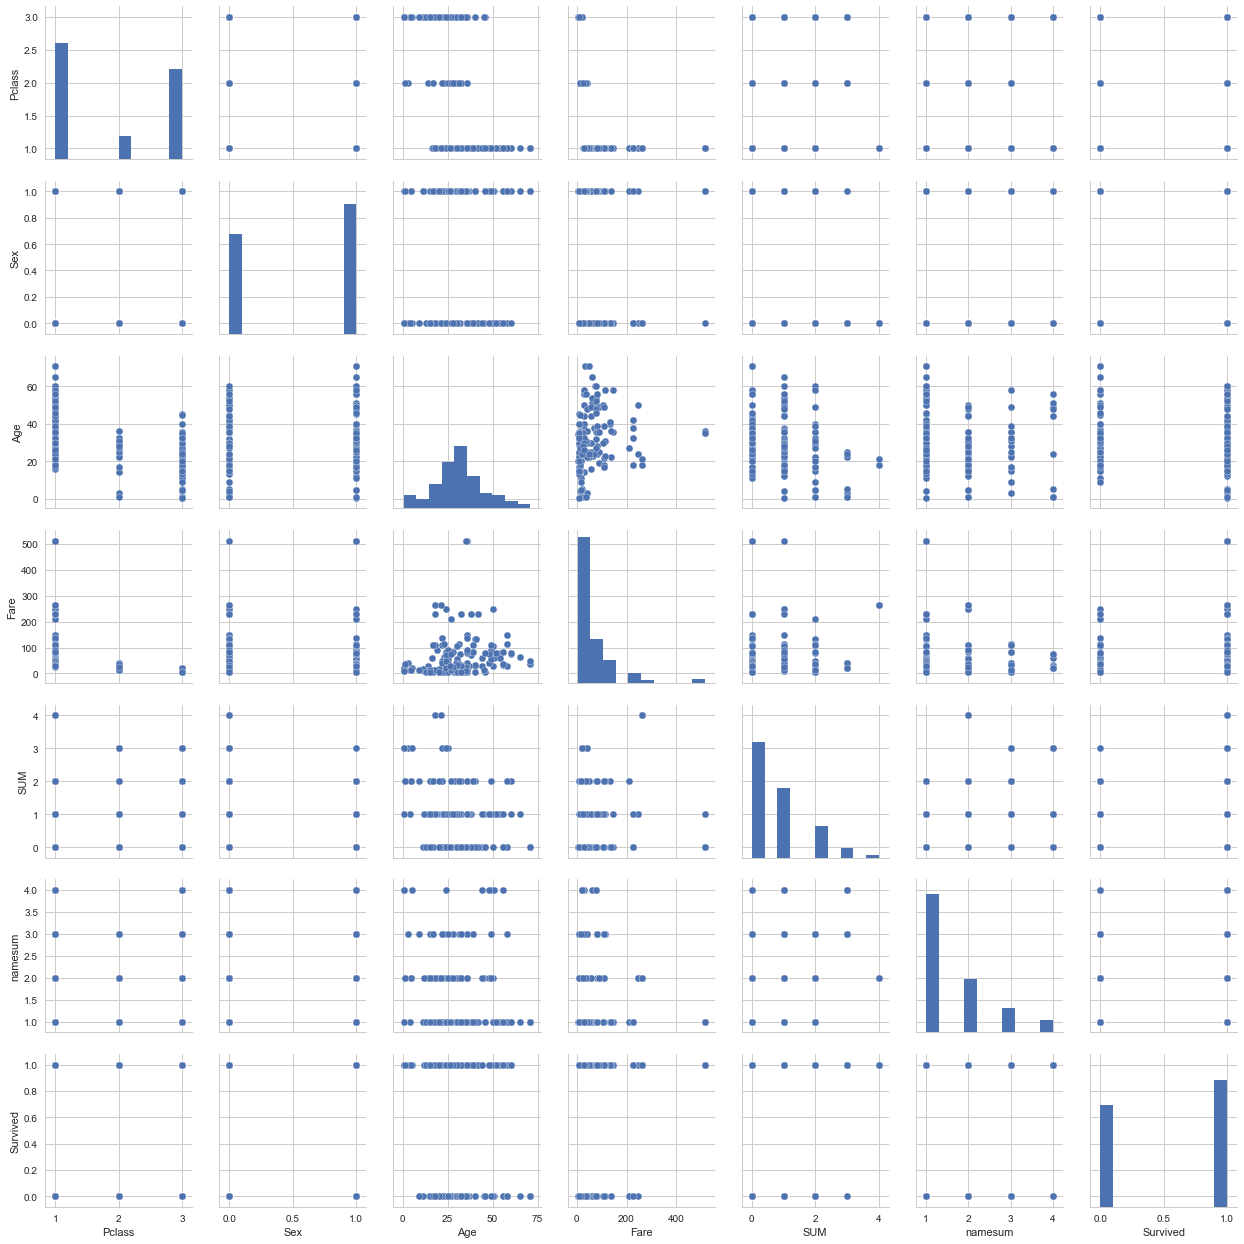

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid",context="notebook")
cols=["Pclass","Sex","Age","Fare","SUM","namesum","Survived"]
sns.pairplot(df[df["C"]==1][cols],size=2.5)
plt.show()

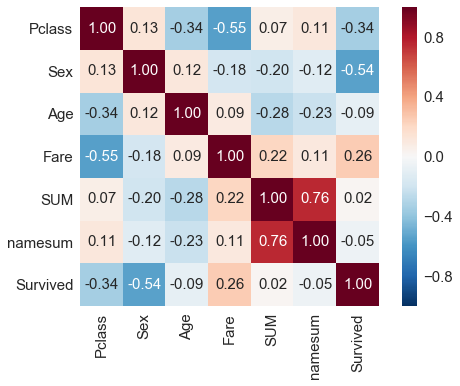

In [103]:
cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt=".2f",annot_kws={"size":15},yticklabels=cols,xticklabels=cols)
plt.show()

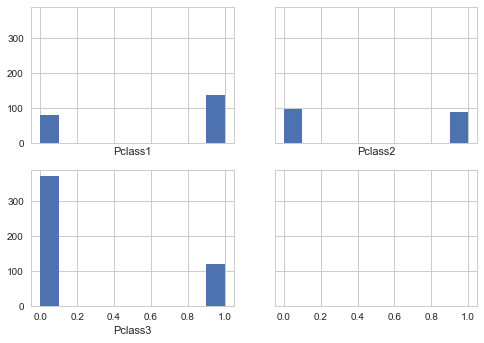

In [98]:
fig,axes=plt.subplots(2,2,sharex=True,sharey=True)
axes[0,0].hist(df[df["Pclass"]==1]["Survived"])
axes[0,0].set_xlabel("Pclass1")
axes[0,1].hist(df[df["Pclass"]==2]["Survived"])
axes[0,1].set_xlabel("Pclass2")
axes[1,0].hist(df[df["Pclass"]==3]["Survived"])
axes[1,0].set_xlabel("Pclass3")
plt.show()

In [18]:
"""
imr=Imputer(missing_values="NaN",strategy="mean",axis=0)
imr.fit(x)
x=pd.DataFrame(imr.transform(x),columns=["Pclass","Sex","Age","SibSp","Parch","Fare","miss","mr","mrs","master","SUM","namesum","C","Q","S"])
"""

In [105]:
#df.columns=["PassengerId","Survived","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()

In [21]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
sc2=StandardScaler()
sc3=StandardScaler()
sc4=StandardScaler()
x["Fare"]= sc1.fit_transform(x["Fare"])
x["SibSp"]=sc2.fit_transform(x["SibSp"])
x["Parch"]=sc3.fit_transform(x["Parch"])
x["Age"]=sc4.fit_transform(x["Age"])

NameError: name 'x' is not defined

In [67]:
sc7=StandardScaler()
sc5=StandardScaler()
sc6=StandardScaler()
x["Pclass"]= sc7.fit_transform(x["Pclass"])
x["namesum"]=sc5.fit_transform(x["namesum"])
x["SUM"]=sc6.fit_transform(x["SUM"])

C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if yo

In [22]:
x.isnull().sum()

Pclass     0
Sex        0
Age        0
SibSp      0
Parch      0
Fare       0
miss       0
mr         0
mrs        0
master     0
SUM        0
namesum    0
C          0
Q          0
S          0
dtype: int64

In [17]:
x.ix[:,"Fare"].isnull().sum()

0

In [30]:
y

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

In [31]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,miss,mr,mrs,master,SUM,namesum,C,Q,S
0,0.827377,1.0,-0.547628,0.432793,-0.473674,-0.502445,0.0,0.0,0.0,1.0,0.059160,0.079241,0.0,0.0,1.0
1,-1.566107,0.0,0.635104,0.432793,-0.473674,0.786845,0.0,1.0,0.0,0.0,0.059160,-0.593173,1.0,0.0,0.0
2,0.827377,0.0,-0.251945,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,-0.560975,-0.593173,0.0,0.0,1.0
3,-1.566107,0.0,0.413342,0.432793,-0.473674,0.420730,0.0,1.0,0.0,0.0,0.059160,0.079241,0.0,0.0,1.0
4,0.827377,1.0,0.413342,-0.474545,-0.473674,-0.486337,0.0,0.0,0.0,1.0,-0.560975,0.079241,0.0,0.0,1.0
5,0.827377,1.0,-0.050519,-0.474545,-0.473674,-0.478116,0.0,0.0,0.0,1.0,-0.560975,0.751655,0.0,1.0,0.0
6,-1.566107,1.0,1.817836,-0.474545,-0.473674,0.395814,0.0,0.0,0.0,1.0,-0.560975,-0.593173,0.0,0.0,1.0
7,0.827377,1.0,-2.026043,2.247470,0.767630,-0.224083,0.0,0.0,1.0,0.0,1.919564,1.424069,0.0,0.0,1.0
8,0.827377,0.0,-0.178024,-0.474545,2.008933,-0.424256,0.0,1.0,0.0,0.0,0.679295,2.768897,0.0,0.0,1.0
9,-0.369365,0.0,-1.138994,0.432793,-0.473674,-0.042956,0.0,1.0,0.0,0.0,0.059160,0.079241,1.0,0.0,0.0


In [127]:
x=x.iloc[:,[0,1,2,5,10,11,12,13,14]]
x

,Pclass,Sex,Age,Fare,SUM,namesum,C,Q,S
0,0.827377,1.0,-0.547628,-0.502445,0.059160,0.079241,0.0,0.0,1.0
1,-1.566107,0.0,0.635104,0.786845,0.059160,-0.593173,1.0,0.0,0.0
2,0.827377,0.0,-0.251945,-0.488854,-0.560975,-0.593173,0.0,0.0,1.0
3,-1.566107,0.0,0.413342,0.420730,0.059160,0.079241,0.0,0.0,1.0
4,0.827377,1.0,0.413342,-0.486337,-0.560975,0.079241,0.0,0.0,1.0
5,0.827377,1.0,-0.050519,-0.478116,-0.560975,0.751655,0.0,1.0,0.0
6,-1.566107,1.0,1.817836,0.395814,-0.560975,-0.593173,0.0,0.0,1.0
7,0.827377,1.0,-2.026043,-0.224083,1.919564,1.424069,0.0,0.0,1.0
8,0.827377,0.0,-0.178024,-0.424256,0.679295,2.768897,0.0,0.0,1.0
9,-0.369365,0.0,-1.138994,-0.042956,0.059160,0.079241,1.0,0.0,0.0


In [36]:
"""
survival
Survival
0 = No, 1 = Yes
pclass
Ticket class
1 = 1st, 2 = 2nd, 3 = 3rd
sex
Sex

Age
Age in years

sibsp
# of siblings / spouses aboard the Titanic
伴侶が載ってる
parch
# of parents / children aboard the Titanic
子供が載ってる
ticket
Ticket number

fare
Passenger fare

cabin
Cabin number

embarked
Port of Embarkation
"""

'\nsurvival\nSurvival\n0 = No, 1 = Yes\npclass\nTicket class\n1 = 1st, 2 = 2nd, 3 = 3rd\nsex\nSex\n\nAge\nAge in years\n\nsibsp\n# of siblings / spouses aboard the Titanic\n伴侶が載ってる\nparch\n# of parents / children aboard the Titanic\n子供が載ってる\nticket\nTicket number\n\nfare\nPassenger fare\n\ncabin\nCabin number\n\nembarked\nPort of Embarkation\n'

In [132]:
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
gs=GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),param_grid=[{"max_depth":[3,4,5,6,7]}],
               scoring="accuracy",cv=5,n_jobs=-1)
gs.fit(x_train,y_train)
scores=cross_val_score(gs,x_train,y_train,scoring="accuracy",cv=5,n_jobs=-1)
print(np.mean(scores))
from sklearn.svm import SVC
svc=SVC()
param_range=[0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
gs1=GridSearchCV(estimator=svc,param_grid=[{"C":param_range,"kernel":["linear"]},
                                           {"C":param_range,"gamma":param_range,"kernel":["rbf"]}],
                n_jobs=-1)
gs1=gs1.fit(x_train,y_train)
print(gs1.best_score_)
print(gs1.best_params_)

0.815290322581
0.8170144462279294
{'C': 1000.0, 'kernel': 'linear'}


In [135]:
svc=SVC(kernel="linear",C=1000)
svc.fit(x_train,y_train)

KeyboardInterrupt: 

In [68]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,miss,mr,mrs,master,SUM,namesum,C,Q,S
0,3.0,1.0,22.000000,1.0,0.0,7.2500,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0
1,1.0,0.0,38.000000,1.0,0.0,71.2833,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,3.0,0.0,26.000000,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,35.000000,1.0,0.0,53.1000,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0
4,3.0,1.0,35.000000,0.0,0.0,8.0500,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0
5,3.0,1.0,28.724891,0.0,0.0,8.4583,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0
6,1.0,1.0,54.000000,0.0,0.0,51.8625,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,3.0,1.0,2.000000,3.0,1.0,21.0750,0.0,0.0,1.0,0.0,4.0,4.0,0.0,0.0,1.0
8,3.0,0.0,27.000000,0.0,2.0,11.1333,0.0,1.0,0.0,0.0,2.0,6.0,0.0,0.0,1.0
9,2.0,0.0,14.000000,1.0,0.0,30.0708,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0


In [68]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
from sklearn.cross_validation import train_test_split
#imr=Imputer(missing_values="NaN",strategy="mean",axis=1)
#x1=imr.fit_transform(x)
#x1=x1[:,[0,1,2,3,4,5,10,11,12,13,14]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
forest.fit(x_train,y_train)
y_pred=forest.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true=y_train,y_pred=forest.predict(x_train)))
print(accuracy_score(y_true=y_test,y_pred=y_pred))

0.967897271268
0.817164179104


In [70]:
mv_clf.fit(x_train,y_train)
y_pred4=mv_clf.predict(x_test)
print(accuracy_score(y_true=y_train,y_pred=mv_clf.predict(x_train)))
print(accuracy_score(y_true=y_test,y_pred=y_pred4))

0.898876404494
0.813432835821


In [32]:
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
clf1=RandomForestClassifier()
clf2=LogisticRegression(penalty="l2",C=0.001,random_state=0)
clf3=KNeighborsClassifier(n_neighbors=1,p=2,metric="minkowski")
clf4=SVC(kernel="rbf",C=0.1,random_state=0)
clf5=LinearRegression()
#scores=cross_val_score(estimator=clf1,X=x_train,y=y_train,cv=10,scoring="roc_auc",n_jobs=-1)
#print(np.mean(scores),np.std(scores))
clf1.fit(x_train,y_train)
y_pred=clf1.predict(x_test)
print(accuracy_score(y_true=y_test,y_pred=y_pred))
clf2.fit(x_train,y_train)
y_pred2=clf2.predict(x_test)
print(accuracy_score(y_true=y_test,y_pred=y_pred2))
clf3.fit(x_train,y_train)
y_pred3=clf3.predict(x_test)
print(accuracy_score(y_true=y_test,y_pred=y_pred3))

0.768656716418
0.694029850746
0.746268656716


In [69]:
from sklearn.ensemble import VotingClassifier
mv_clf=VotingClassifier([("clf1",clf1),("clf2",clf2),("clf3",clf3),("clf4",clf4)],voting="hard",n_jobs=-1)
mv_clf.fit(x_train,y_train)
y_pred4=mv_clf.predict(x_test)
print(accuracy_score(y_true=y_train,y_pred=mv_clf.predict(x_train)))
print(accuracy_score(y_true=y_test,y_pred=y_pred4))

0.894060995185
0.817164179104


In [80]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.externals import six 
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import operator
class MajorityVoteClassifier(BaseEstimator,ClassifierMixin):
    def __init__(self,classifiers,vote="classlabel",weights=None):
        self.classifiers=classifiers
        self.named_classifiers={key: value for key,value in _name_estimators(classifiers)}
        self.vote=vote
        self.weights=weights
        
    def fit(self,X,y):
        self.lablenc_=LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_=self.lablenc_.classes_
        self.self.classifiers_=[]
        for clf in self.classifiers:
            fitted_clf=clone(clf).fit(X,self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self
    def predict(self,X):
        if self.vote=="probability":
            maj_vote=np.argmax(self.predict_proba(X),axis=1)
        else:
            predictions=np.asarray([clf.predict(X) for clf in self.classifiers_]).T
            
            maj_vote=np.apply_along_axis(
            lambda x:
            np.argmax(np.bincount(x,weights=self.weights)),
            axis=1,arr=predictions)
        maj_vote=self.lablenc_.inverse_transform(maj_vote)
        return maj_vote
    def predict_proba(self,X):
        probas=np.asarray([clf.predict_proba(X) for clf in self.classifiers_])
        avg_proba=np.average(probas,axis=0,weights=self.weights)
        return avg_proba
    
    def get_params(self,deep=True):
        if not deep:
            return super(MajorityVoteClassifier,self).get_params(deep=False)
        else:
            out=self.named_classifiers.copy()
            for name,step in six.iteritems(self.named_classifiers):
                for key,value in six.iteritems(step.get_params(deep=True)):
                    out["%s__%s"%(name,key)]=value
            return out

In [38]:
from sklearn.ensemble import VotingClassifier

In [18]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
sc2=StandardScaler()
sc3=StandardScaler()
sc4=StandardScaler()
x.ix[:,"Fare"]= sc1.fit_transform(x.ix[:,"Fare"])
x.ix[:,"SibsSp"]=sc2.fit_transform(x.ix[:,"SibSp"])
x.ix[:,"Parch"]=sc3.fit_transform(x.ix[:,"Parch"])
x.ix[:,"Age"]=sc4.fit_transform(x.ix[:,"Age"])

C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\User\Doc

In [85]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,miss,mrs,master,mr,SUM,C,Q,S
1,3,1,22,1,0,7.25,0.0,0.0,0.0,1.0,1.0,0,0,1
2,1,0,38,1,0,71.2833,0.0,1.0,0.0,0.0,1.0,1,0,0
3,3,0,26,0,0,7.925,1.0,0.0,0.0,0.0,0.0,0,0,1
4,1,0,35,1,0,53.1,0.0,1.0,0.0,0.0,1.0,0,0,1
5,3,1,35,0,0,8.05,0.0,0.0,0.0,1.0,0.0,0,0,1
6,3,1,32.4098,0,0,8.4583,0.0,0.0,0.0,1.0,0.0,0,1,0
7,1,1,54,0,0,51.8625,0.0,0.0,0.0,1.0,0.0,0,0,1
8,3,1,2,3,1,21.075,0.0,0.0,1.0,0.0,4.0,0,0,1
9,3,0,27,0,2,11.1333,0.0,1.0,0.0,0.0,2.0,0,0,1
10,2,0,14,1,0,30.0708,0.0,1.0,0.0,0.0,1.0,1,0,0


In [28]:
VotingClassifier?

In [35]:
df3=pd.read_csv("test.csv",header=None)
df3.columns=["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]
df3=df3.ix[1:,:]
ss=name_classifier(df3["Name"])
ss=pd.DataFrame(ss.values,index=range(1,419),columns=["miss","mrs","master","mr"])
df4=pd.merge(df3,ss,right_index=True,left_index=True)
namesums=name(df4["Name"])
df4=pd.merge(df4,namesums,right_index=True,left_index=True)
df4["Sex"]=le.transform(df4["Sex"])
sums=f(df4["SibSp"].values,df4["Parch"].values)
sums=pd.DataFrame(sums.values,index=range(1,419),columns=["SUM"])
df4=pd.merge(df4,sums,right_index=True,left_index=True)
s1=pd.get_dummies(df4["Embarked"])
df4=pd.merge(df4,s1,right_index=True,left_index=True)
df4=df4.ix[:,[1,3,4,5,6,8,11,12,13,14,15,16,17,18,19,20]]
df4[df4["miss"]==1]=imr1.transform(df4[df4["miss"]==1])
df4[df4["mr"]==1]=imr2.transform(df4[df4["mr"]==1])
df4[df4["mrs"]==1]=imr3.transform(df4[df4["mrs"]==1])
df4[df4["master"]==1]=imr4.transform(df4[df4["master"]==1])
df4["Fare"]= sc1.transform(df4["Fare"])
df4["SibsSp"]=sc2.transform(df4["SibSp"])
df4["Parch"]=sc3.transform(df4["Parch"])
df4["Age"]=sc4.transform(df4["Age"])
a=df4
x_te=pd.DataFrame(a,index=range(1,419))
#pd.DataFrame(a)
x_te.columns=["Pclass","Sex","Age","SibSp","Parch","Fare","miss","mr","mrs","master","SUM","C","Q","S"]
x_te

KeyError: 0

In [74]:
-

,Pclass,Sex,Age,SibSp,Parch,Fare,miss,mrs,master,mr,SUM,namesum,C,Q,S
0,3,1,34.5,0,0,7.8292,0.0,0.0,0.0,1.0,0.0,1,0,1,0
1,3,0,47.0,1,0,7.0000,0.0,1.0,0.0,0.0,1.0,1,0,0,1
2,2,1,62.0,0,0,9.6875,0.0,0.0,0.0,1.0,0.0,1,0,1,0
3,3,1,27.0,0,0,8.6625,0.0,0.0,0.0,1.0,0.0,1,0,0,1
4,3,0,22.0,1,1,12.2875,0.0,1.0,0.0,0.0,2.0,1,0,0,1
5,3,1,14.0,0,0,9.2250,0.0,0.0,0.0,1.0,0.0,1,0,0,1
6,3,0,30.0,0,0,7.6292,1.0,0.0,0.0,0.0,0.0,1,0,1,0
7,2,1,26.0,1,1,29.0000,0.0,0.0,0.0,1.0,2.0,1,0,0,1
8,3,0,18.0,0,0,7.2292,0.0,1.0,0.0,0.0,0.0,1,1,0,0
9,3,1,21.0,2,0,24.1500,0.0,0.0,0.0,1.0,2.0,4,0,0,1


imr12個の

In [35]:
df3=pd.read_csv("test.csv")
#df3.columns=["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]
#df3=df3.ix[1:,:]
ss=name_classifier(df3["Name"])
ss=pd.DataFrame(ss.values,index=range(418),columns=["miss","mrs","master","mr"])
df4=pd.merge(df3,ss,right_index=True,left_index=True)
sums=f(df4["SibSp"].values,df4["Parch"].values)
sums=pd.DataFrame(sums.values,index=range(418),columns=["SUM"])
df4=pd.merge(df4,sums,right_index=True,left_index=True)
namesums=name(df4["Name"])
df4=pd.merge(df4,namesums,right_index=True,left_index=True)
df4["Sex"]=le.transform(df4["Sex"])
s1=pd.get_dummies(df4["Embarked"])
df4=pd.merge(df4,s1,right_index=True,left_index=True)
df4=df4.ix[:,[1,3,4,5,6,8,11,12,13,14,15,17,18,19,20]]
df4[p((df4["miss"]==1).values,(df4["Pclass"]==1).values)]=imr1.transform(df4[p((df4["miss"]==1).values,(df4["Pclass"]==1).values)])
df4[p((df4["mr"]==1).values,(df4["Pclass"]==1).values)]=imr2.transform(df4[p((df4["mr"]==1).values,(df4["Pclass"]==1).values)])
df4[p((df4["mrs"]==1).values,(df4["Pclass"]==1).values)]=imr3.transform(df4[p((df4["mrs"]==1).values,(df4["Pclass"]==1).values)])
df4[p((df4["master"]==1).values,(df4["Pclass"]==1).values)]=imr4.transform(df4[p((df4["master"]==1).values,(df4["Pclass"]==1).values)])
df4[p((df4["miss"]==1).values,(df4["Pclass"]==2).values)]=imr5.transform(df4[p((df4["miss"]==1).values,(df4["Pclass"]==2).values)])
df4[p((df4["mr"]==1).values,(df4["Pclass"]==2).values)]=imr6.transform(df4[p((df4["mr"]==1).values,(df4["Pclass"]==2).values)])
df4[p((df4["mrs"]==1).values,(df4["Pclass"]==2).values)]=imr7.transform(df4[p((df4["mrs"]==1).values,(df4["Pclass"]==2).values)])
df4[p((df4["master"]==1).values,(df4["Pclass"]==2).values)]=imr8.transform(df4[p((df4["master"]==1).values,(df4["Pclass"]==2).values)])
df4[p((df4["miss"]==1).values,(df4["Pclass"]==3).values)]=imr9.transform(df4[p((df4["miss"]==1).values,(df4["Pclass"]==3).values)])
df4[p((df4["mr"]==1).values,(df4["Pclass"]==3).values)]=imr10.transform(df4[p((df4["mr"]==1).values,(df4["Pclass"]==3).values)])
df4[p((df4["mrs"]==1).values,(df4["Pclass"]==3).values)]=imr11.transform(df4[p((df4["mrs"]==1).values,(df4["Pclass"]==3).values)])
df4[p((df4["master"]==1).values,(df4["Pclass"]==3).values)]=imr12.transform(df4[p((df4["master"]==1).values,(df4["Pclass"]==3).values)])
x_te=df4
#x_te=pd.DataFrame(a,index=range(418))
#pd.DataFrame(a)
#x_te.columns=["Pclass","Sex","Age","SibSp","Parch","Fare","miss","mr","mrs","master","SUM","C","Q","S"]
x_te

,Pclass,Sex,Age,SibSp,Parch,Fare,miss,mrs,master,mr,SUM,namesum,C,Q,S
0,3,1,34.5,0,0,7.8292,0.0,0.0,0.0,1.0,0.0,1,0,1,0
1,3,0,47.0,1,0,7.0000,0.0,1.0,0.0,0.0,1.0,1,0,0,1
2,2,1,62.0,0,0,9.6875,0.0,0.0,0.0,1.0,0.0,1,0,1,0
3,3,1,27.0,0,0,8.6625,0.0,0.0,0.0,1.0,0.0,1,0,0,1
4,3,0,22.0,1,1,12.2875,0.0,1.0,0.0,0.0,2.0,1,0,0,1
5,3,1,14.0,0,0,9.2250,0.0,0.0,0.0,1.0,0.0,1,0,0,1
6,3,0,30.0,0,0,7.6292,1.0,0.0,0.0,0.0,0.0,1,0,1,0
7,2,1,26.0,1,1,29.0000,0.0,0.0,0.0,1.0,2.0,1,0,0,1
8,3,0,18.0,0,0,7.2292,0.0,1.0,0.0,0.0,0.0,1,1,0,0
9,3,1,21.0,2,0,24.1500,0.0,0.0,0.0,1.0,2.0,4,0,0,1


In [134]:
x_te=x_te.ix[:,[0,1,2,5,10,11,12,13,14]]

In [75]:
x_te=pd.DataFrame(imr.transform(x_te))
#x_te=x_te.ix[:,[0,1,2,5,10,11,12,13,14]]
x_te.columns=["Pclass","Sex","Age","SibSp","Parch","Fare","miss","mrs","master","mr","SUM","namesum","C","Q","S"]
x_te.isnull().sum()

Pclass     0
Sex        0
Age        0
SibSp      0
Parch      0
Fare       0
miss       0
mrs        0
master     0
mr         0
SUM        0
namesum    0
C          0
Q          0
S          0
dtype: int64

In [76]:
x_te2=x_te
x_te2["Fare"]= sc1.transform(x_te2["Fare"])
x_te2["SibSp"]=sc2.transform(x_te2["SibSp"])
x_te2["Parch"]=sc3.transform(x_te2["Parch"])
x_te2["Age"]=sc4.transform(x_te2["Age"])
x_te2["Pclass"]= sc7.transform(x_te2["Pclass"])
x_te2["namesum"]=sc5.transform(x_te2["namesum"])
x_te2["SUM"]=sc6.transform(x_te2["SUM"])
x_te2.isnull().sum()
x_te2

C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if yo

,Pclass,Sex,Age,SibSp,Parch,Fare,miss,mrs,master,mr,SUM,namesum,C,Q,S
0,0.827377,1.0,0.387175,-0.474545,-0.473674,-0.490783,0.0,0.0,0.0,1.0,-0.560975,-0.593173,0.0,1.0,0.0
1,0.827377,0.0,1.330893,0.432793,-0.473674,-0.507479,0.0,1.0,0.0,0.0,0.059160,-0.593173,0.0,0.0,1.0
2,-0.369365,1.0,2.463354,-0.474545,-0.473674,-0.453367,0.0,0.0,0.0,1.0,-0.560975,-0.593173,0.0,1.0,0.0
3,0.827377,1.0,-0.179056,-0.474545,-0.473674,-0.474005,0.0,0.0,0.0,1.0,-0.560975,-0.593173,0.0,0.0,1.0
4,0.827377,0.0,-0.556543,0.432793,0.767630,-0.401017,0.0,1.0,0.0,0.0,0.679295,-0.593173,0.0,0.0,1.0
5,0.827377,1.0,-1.160523,-0.474545,-0.473674,-0.462679,0.0,0.0,0.0,1.0,-0.560975,-0.593173,0.0,0.0,1.0
6,0.827377,0.0,0.047436,-0.474545,-0.473674,-0.494810,1.0,0.0,0.0,0.0,-0.560975,-0.593173,0.0,1.0,0.0
7,-0.369365,1.0,-0.254553,0.432793,0.767630,-0.064516,0.0,0.0,0.0,1.0,0.679295,-0.593173,0.0,0.0,1.0
8,0.827377,0.0,-0.858533,-0.474545,-0.473674,-0.502864,0.0,1.0,0.0,0.0,-0.560975,-0.593173,1.0,0.0,0.0
9,0.827377,1.0,-0.632041,1.340132,-0.473674,-0.162169,0.0,0.0,0.0,1.0,0.679295,1.424069,0.0,0.0,1.0


In [44]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,miss,mrs,master,mr,SUM,namesum,C,Q,S
0,0.827377,1.0,-0.528472,0.432793,-0.473674,-0.502445,0.0,0.0,0.0,1.0,0.059160,0.079241,0.0,0.0,1.0
1,-1.566107,0.0,0.658497,0.432793,-0.473674,0.786845,0.0,1.0,0.0,0.0,0.059160,-0.593173,1.0,0.0,0.0
2,0.827377,0.0,-0.231730,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,-0.560975,-0.593173,0.0,0.0,1.0
3,-1.566107,0.0,0.435941,0.432793,-0.473674,0.420730,0.0,1.0,0.0,0.0,0.059160,0.079241,0.0,0.0,1.0
4,0.827377,1.0,0.435941,-0.474545,-0.473674,-0.486337,0.0,0.0,0.0,1.0,-0.560975,0.079241,0.0,0.0,1.0
5,0.827377,1.0,-0.231730,-0.474545,-0.473674,-0.478116,0.0,0.0,0.0,1.0,-0.560975,0.751655,0.0,1.0,0.0
6,-1.566107,1.0,1.845466,-0.474545,-0.473674,0.395814,0.0,0.0,0.0,1.0,-0.560975,-0.593173,0.0,0.0,1.0
7,0.827377,1.0,-2.012183,2.247470,0.767630,-0.224083,0.0,0.0,1.0,0.0,1.919564,1.424069,0.0,0.0,1.0
8,0.827377,0.0,-0.157544,-0.474545,2.008933,-0.424256,0.0,1.0,0.0,0.0,0.679295,2.768897,0.0,0.0,1.0
9,-0.369365,0.0,-1.121956,0.432793,-0.473674,-0.042956,0.0,1.0,0.0,0.0,0.059160,0.079241,1.0,0.0,0.0


In [77]:
y2_pred=mv_clf.predict(x_te2)
len(y2_pred)

418

In [41]:
y1_pred=forest.predict(x_te)
len(y1_pred)

418

In [78]:
zip_data = zip(df3.ix[:,0].astype(int), y2_pred.astype(int))
predict_data = list(zip_data)
import csv
with open("predcit_result_data.csv","w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(df3.ix[:,0].astype(int), y2_pred.astype(int)):
        writer.writerow([pid, survived])

In [79]:
predict_data

[(892, 0),
 (893, 0),
 (894, 0),
 (895, 0),
 (896, 0),
 (897, 0),
 (898, 0),
 (899, 0),
 (900, 1),
 (901, 0),
 (902, 0),
 (903, 0),
 (904, 1),
 (905, 0),
 (906, 1),
 (907, 1),
 (908, 0),
 (909, 0),
 (910, 0),
 (911, 1),
 (912, 0),
 (913, 1),
 (914, 1),
 (915, 0),
 (916, 0),
 (917, 0),
 (918, 1),
 (919, 0),
 (920, 0),
 (921, 0),
 (922, 0),
 (923, 0),
 (924, 0),
 (925, 0),
 (926, 0),
 (927, 0),
 (928, 1),
 (929, 0),
 (930, 0),
 (931, 0),
 (932, 0),
 (933, 0),
 (934, 0),
 (935, 1),
 (936, 1),
 (937, 0),
 (938, 0),
 (939, 0),
 (940, 1),
 (941, 0),
 (942, 0),
 (943, 0),
 (944, 1),
 (945, 1),
 (946, 0),
 (947, 0),
 (948, 0),
 (949, 0),
 (950, 0),
 (951, 1),
 (952, 0),
 (953, 0),
 (954, 0),
 (955, 1),
 (956, 1),
 (957, 1),
 (958, 1),
 (959, 0),
 (960, 0),
 (961, 0),
 (962, 1),
 (963, 0),
 (964, 0),
 (965, 0),
 (966, 1),
 (967, 0),
 (968, 0),
 (969, 1),
 (970, 0),
 (971, 1),
 (972, 1),
 (973, 0),
 (974, 0),
 (975, 0),
 (976, 0),
 (977, 0),
 (978, 0),
 (979, 0),
 (980, 0),
 (981, 1),
 (982, 0),

In [213]:
list(range(1,3))

[1, 2]

In [49]:
import matplotlib as plt
import seaborn as sns

sns.set(style="whitegrid")
cols=["PassengerId","Survived","Pclass","Sex","Age","Fare","SUM"]

#sns.pairplot(df1[cols],size=2.5)
#plt.show()
type(df1["Age"].values[0])

numpy.float64

In [74]:
x_te2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.0,1.0,34.500000,0.0,0.0,7.8292,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,3.0,0.0,47.000000,1.0,0.0,7.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2.0,1.0,62.000000,0.0,0.0,9.6875,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,3.0,1.0,27.000000,0.0,0.0,8.6625,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,3.0,0.0,22.000000,1.0,1.0,12.2875,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0
5,3.0,1.0,14.000000,0.0,0.0,9.2250,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,3.0,0.0,30.000000,0.0,0.0,7.6292,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,2.0,1.0,26.000000,1.0,1.0,29.0000,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0
8,3.0,0.0,18.000000,0.0,0.0,7.2292,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,3.0,1.0,21.000000,2.0,0.0,24.1500,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0
